In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Checking for null values

In [5]:
df.isnull().values.any()

False

# Explorative data analysis

Text(0, 0.5, 'Frequency')

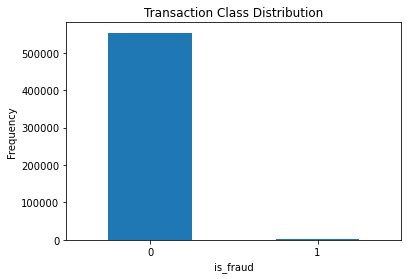

In [15]:
count_classes = pd.value_counts(df["is_fraud"], sort = True)
count_classes.plot(kind = "bar", rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2))
plt.xlabel("is_fraud")
plt.ylabel("Frequency")

#  Getting the fraud and the normal dataset

In [17]:
fraud = df[df["is_fraud"]==1]
normal = df[df["is_fraud"]==0]

In [18]:
print(fraud.shape,normal.shape)

(2145, 23) (553574, 23)


## Amount of money used in different transactions

In [19]:
fraud.amt.describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

In [20]:
normal.amt.describe()

count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

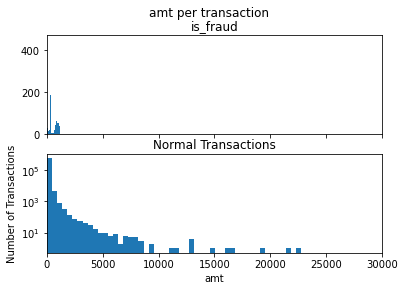

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("amt per transaction")
bins = 50
ax1.hist(fraud.amt, bins = bins)
ax1.set_title("is_fraud")
ax2.hist(normal.amt, bins = bins)
ax2.set_title("Normal Transactions")
plt.xlabel("amt")
plt.ylabel("Number of Transactions")
plt.xlim(0, 30000)
plt.yscale("log")
plt.show();

In [58]:
import sklearn
import scipy
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams["figure.figsize"] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "fraud"]

##  checking if fraudulent transactions occured more often during certain time frame

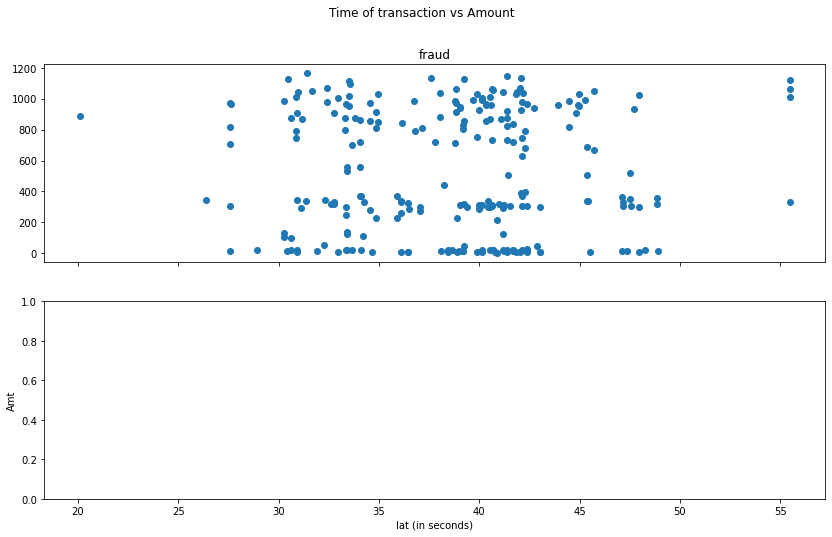

In [59]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("Time of transaction vs Amount")
ax1.scatter(fraud.lat, fraud.amt)
ax1.set_title("fraud")

plt.xlabel("lat (in seconds)")
plt.ylabel("Amt")
plt.show()


In [60]:
df1=df.sample(frac = 0.1,random_state=1)
df1.shape

(55572, 23)

In [61]:
df.shape

(555719, 23)

In [62]:
fraud = df1[df1["is_fraud"]==1]
valid = df1[df1["is_fraud"]==0]
outlier_fraction = len(fraud)/float(len(valid))

In [63]:
print(outlier_fraction)

print("fraud cases : {}".format(len(fraud)))
print("Valid cases : {}".format(len(valid)))

0.004337453914552158
fraud cases : 240
Valid cases : 55332


# Correlation

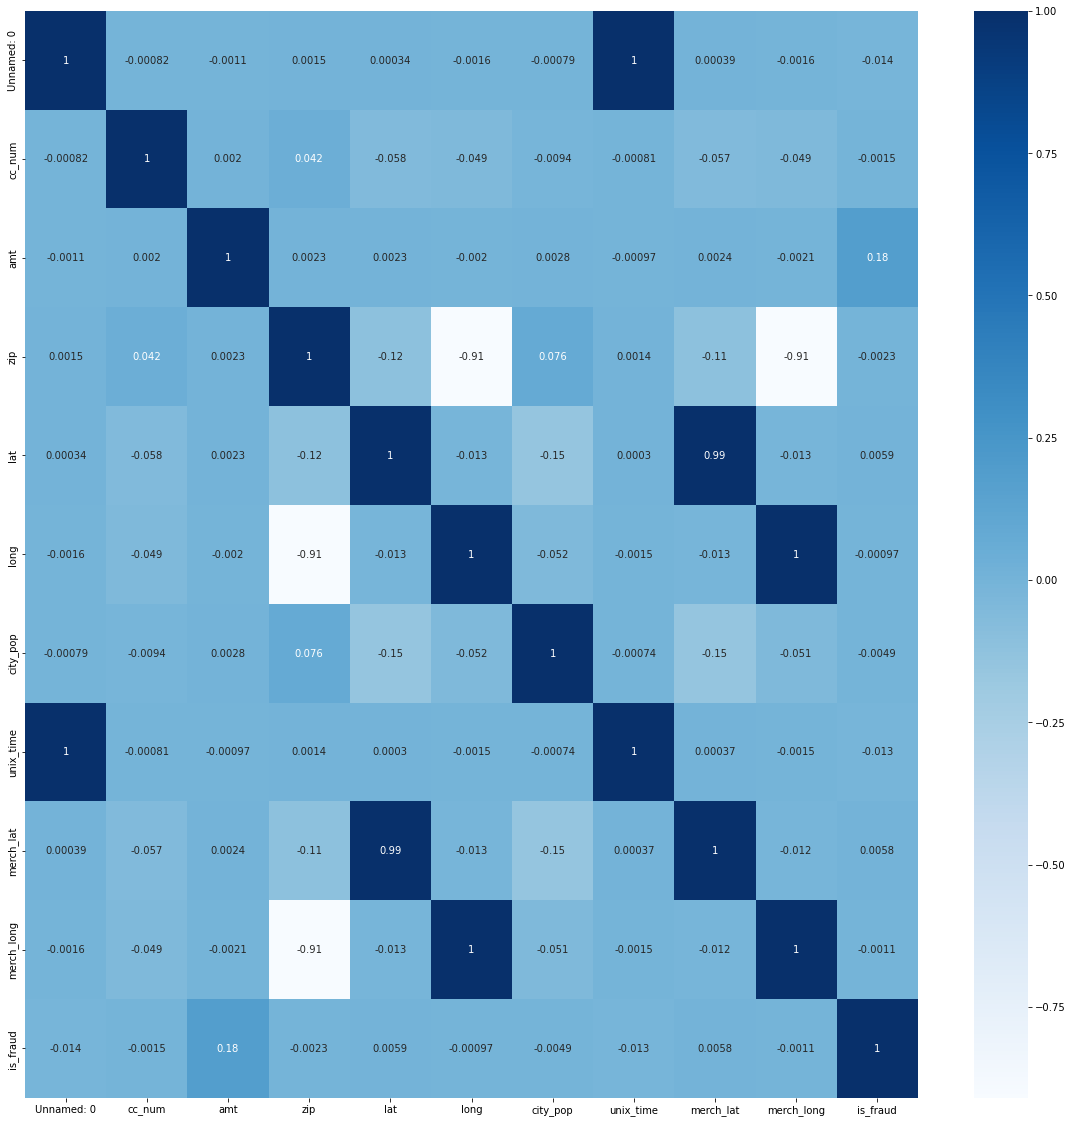

In [64]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")

In [65]:
columns = df1.columns.tolist()
columns = [c for c in columns if c not in ["is_fraud"]]
target = "is_fraud"
state = np.random.RandomState(42)
X = df1[columns]
Y = df1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(55572, 22)
(55572,)


In [68]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                      contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm="auto",
                                             leaf_size=30,metric="minkowski",
                                             p=2,metric_params=None, contamination=outlier_fraction),
    "support Vector Machine":OneClassSVM(kernel="rbf", degree=3, gamma=0.1,nu=0.05,
                                        max_iter=-1)
}

In [69]:
type(classifiers)

dict

In [ ]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y, y_pred))